## Import Packages

In [40]:
import pandas as pd

## Read in Data

In [41]:
WB2019=pd.read_csv(r"C:\Users\nbroo\OneDrive\Documents\Data Science Final Group Project\Women In Business Before And After The Pandemic\2019 (2018) Census Business Data.csv")
WB2019.head()

C:\Users\nbroo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,4,5,7,8,9,10,12,14,16,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GEO_ID,GEO_ID_F,NAME,NAICS2017,NAICS2017_F,INDLEVEL,NAICS2017_LABEL,INDGROUP,SECTOR,SUBSECTOR,...,PAYANN,PAYANN_PCT,FIRMPDEMP_S,FIRMPDEMP_PCT_S,RCPPDEMP_S,RCPPDEMP_PCT_S,EMP_S,EMP_PCT_S,PAYANN_S,PAYANN_PCT_S
0,id,Geo Footnote,Geographic Area Name,2017 NAICS code,2017 NAICS Footnote,Industry level,Meaning of NAICS code,Industry group,NAICS economic sector,SUBSECTOR,...,"Annual payroll ($1,000)",Percent of annual payroll (%),Relative standard error of employer firms (%),Standard error of percent of employer firms (%),"Relative standard error of sales, value of shi...","Standard error of percent of sales, value of s...",Relative standard error of number of employees...,Standard error of percent of employees (%),Relative standard error of annual payroll (%),Standard error of percent of annual payroll (%)
1,0100000US,NaN,United States,0,NaN,2,Total for all sectors,NaN,0,NaN,...,6937240308,X,0,X,1.2,X,0.5,X,0.5,X
2,0100000US,NaN,United States,0,NaN,2,Total for all sectors,NaN,0,NaN,...,454218390,14.2,0.4,0.6,1.3,66.8,1.1,61.6,1.3,67.2
3,0100000US,NaN,United States,0,NaN,2,Total for all sectors,NaN,0,NaN,...,478308387,15,0.6,0.3,3,87,1.5,68.9,2.7,77.9
4,0100000US,NaN,United States,0,NaN,2,Total for all sectors,NaN,0,NaN,...,75150602,2.4,2.5,0.1,7.8,12.4,4.8,7,4.2,10.1


## Drop Unwanted Columns

In [42]:
WB2019.drop(['GEO_ID', 'GEO_ID_F', 'NAME', 'NAICS2017_F', 'INDLEVEL', 'NAICS2017_LABEL', 'INDGROUP', 'SECTOR', 'SUBSECTOR', 'SEX_LABEL', 'ETH_GROUP_LABEL', 'RACE_GROUP_LABEL', 'VET_GROUP_LABEL', 'QDESC','QDESC_LABEL', 'BUSCHAR', 'BUSCHAR_LABEL', 'YEAR', 'FIRMPDEMP','FIRMPDEMP_PCT', 'EMP_PCT', 'PAYANN','RCPPDEMP_PCT', 'PAYANN_PCT', 'FIRMPDEMP_S', 'FIRMPDEMP_PCT_S','RCPPDEMP_PCT_S', 'EMP_PCT_S', 'PAYANN_S', 'PAYANN_PCT_S'], axis = 1, inplace = True)
WB2019.head()

,NAICS2017,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,RCPPDEMP,EMP,RCPPDEMP_S,EMP_S
0,2017 NAICS code,Sex code,Ethnicity code,Race code,Veteran code,"Sales, value of shipments, or revenue of emplo...",Number of employees,"Relative standard error of sales, value of shi...",Relative standard error of number of employees...
1,0,1,1,0,1,38405539368,128196406,1.2,0.5
2,0,1,1,0,1,2270021185,10991334,1.3,1.1
3,0,1,1,0,1,2462681905,11240900,3,1.5
4,0,1,1,0,1,413777541,1423837,7.8,4.8


## Get Unique Values of Sex Column

In [43]:
WB2019['SEX'].unique()

array(['Sex code', '1', '2', '3', '4', '96', '98', 2, 3, 4, 1, 96, 98],
      dtype=object)

### Looks like we have two types of "2". Going to view the count of each

In [46]:
WB2019.SEX.value_counts()

1           16380
1            8224
3            5285
4            5036
2            4564
3            2764
4            2587
2            2273
96            607
98            482
96            295
98            240
Sex code        1
Name: SEX, dtype: int64

### Now adding them together.

In [47]:
WB2019.SEX.value_counts().sum()

48738

## Select only rows with the value of 2

In [48]:
WB2019 = WB2019[(WB2019['SEX'].isin(['2', 2]))]

## Confirm that we have the correct number of rows

In [49]:
WB2019.shape

(6837, 9)

# Rename Columns

In [50]:
WB2019_1 = WB2019.rename(columns={'NAICS2017':'NAICS',
                                       'SEX':'Owners_Sex',
                                       'ETH_GROUP': 'Owners_Ethnicity', 
                                       'RACE_GROUP':'Owners_Race', 
                                       'VET_GROUP':'Vet_Status', 
                                       'RCPPDEMP':'Sales', 
                                       'EMP': 'Employees', 
                                       'RCPPDEMP_S':'Sales_Std_Error', 
                                       'EMP_S':'Employees_Std_Error'})

In [51]:
WB2019_1.head()

,NAICS,Owners_Sex,Owners_Ethnicity,Owners_Race,Vet_Status,Sales,Employees,Sales_Std_Error,Employees_Std_Error
9,0,2,1,0,1,1776835350,10149257,4.5,1.9
10,0,2,1,0,1,282385501,2150147,6.1,3
11,0,2,1,0,1,267427453,1499541,8.2,2.8
12,0,2,1,0,1,31555727,127916,22.3,18.4
13,0,2,1,0,1,S,"25,000 to 49,999 employees",S,S


# Convert datatype to integer

In [52]:
WB2019_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6837 entries, 9 to 48692
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NAICS                6837 non-null   object
 1   Owners_Sex           6837 non-null   object
 2   Owners_Ethnicity     6837 non-null   object
 3   Owners_Race          6837 non-null   object
 4   Vet_Status           6837 non-null   object
 5   Sales                6837 non-null   object
 6   Employees            6837 non-null   object
 7   Sales_Std_Error      6837 non-null   object
 8   Employees_Std_Error  6837 non-null   object
dtypes: object(9)
memory usage: 534.1+ KB


In [53]:
WB2019_2 = WB2019_1.apply(pd.to_numeric, errors='coerce')

In [54]:
print(WB2019_2)

       NAICS  Owners_Sex  Owners_Ethnicity  Owners_Race  Vet_Status  \
9        0.0           2                 1            0           1   
10       0.0           2                 1            0           1   
11       0.0           2                 1            0           1   
12       0.0           2                 1            0           1   
13       0.0           2                 1            0           1   
...      ...         ...               ...          ...         ...   
48688   99.0           2                 1            0           4   
48689   99.0           2                 1            0           4   
48690   99.0           2                 1            0           4   
48691   99.0           2                 1            0           4   
48692   99.0           2                 1            0           4   

              Sales   Employees  Sales_Std_Error  Employees_Std_Error  
9      1.776835e+09  10149257.0              4.5                  1.9  
10 

In [55]:
WB2019_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6837 entries, 9 to 48692
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NAICS                4912 non-null   float64
 1   Owners_Sex           6837 non-null   int64  
 2   Owners_Ethnicity     6837 non-null   int64  
 3   Owners_Race          6837 non-null   int64  
 4   Vet_Status           6837 non-null   int64  
 5   Sales                379 non-null    float64
 6   Employees            4470 non-null   float64
 7   Sales_Std_Error      379 non-null    float64
 8   Employees_Std_Error  4470 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 534.1 KB


# Use Chi-Squares to determine if Owners_Race depends on Sales

## Create a contingency table:

In [56]:
from scipy import stats

In [57]:
WB2019_crosstab = pd.crosstab(WB2019_2['Owners_Race'], WB2019_2['Sales'])

In [58]:
stats.chi2_contingency(WB2019_crosstab)

(2653.0,
 1.4926113826710025e-15,
 2100,
 array([[1.29287599, 0.64643799, 0.64643799, ..., 3.87862797, 3.87862797,
         3.87862797],
        [0.03166227, 0.01583113, 0.01583113, ..., 0.09498681, 0.09498681,
         0.09498681],
        [0.03166227, 0.01583113, 0.01583113, ..., 0.09498681, 0.09498681,
         0.09498681],
        ...,
        [0.22691293, 0.11345646, 0.11345646, ..., 0.68073879, 0.68073879,
         0.68073879],
        [0.13192612, 0.06596306, 0.06596306, ..., 0.39577836, 0.39577836,
         0.39577836],
        [0.22163588, 0.11081794, 0.11081794, ..., 0.66490765, 0.66490765,
         0.66490765]]))

### p-value > 0.05, therefore there is not a significant relationship between owners_sex and the number of sales. The values in the array are less than 5 and therefore does not meet the assumption.


# Determine if Owners_Race depends on NAICS

In [59]:
WB2019_crosstab2 = pd.crosstab(WB2019_2['Owners_Race'], WB2019_2['NAICS'])

In [60]:
stats.chi2_contingency(WB2019_crosstab2)

(1649.0466146064973,
 1.7041160848201805e-271,
 112,
 array([[405.08916938, 159.92100977, 136.13110749, 200.23167752,
         231.95154723, 197.58835505, 197.58835505, 251.11563518,
         167.8509772 , 241.2031759 , 222.03908795, 247.15065147,
         206.17915309, 226.66490228, 155.29519544],
        [  5.36624593,   2.11848534,   1.80333876,   2.65248371,
           3.07267915,   2.61746743,   2.61746743,   3.32654723,
           2.2235342 ,   3.19523616,   2.94136808,   3.2740228 ,
           2.73127036,   3.00264658,   2.05720684],
        [  5.24144951,   2.06921824,   1.76140065,   2.59079805,
           3.0012215 ,   2.55659609,   2.55659609,   3.24918567,
           2.1718241 ,   3.12092834,   2.87296417,   3.19788274,
           2.66775244,   2.93281759,   2.00936482],
        [  5.11665309,   2.01995114,   1.71946254,   2.52911238,
           2.92976384,   2.49572476,   2.49572476,   3.1718241 ,
           2.12011401,   3.04662052,   2.80456026,   3.12174267,
           

### p-value > 0.05, therefore not a significant relationship between owner's race and NAICS codes. The values in the array are more than 5 and it does meet the assumption.

# Run a correlation matrix

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
WB2019_2.corr(method='pearson')

,NAICS,Owners_Sex,Owners_Ethnicity,Owners_Race,Vet_Status,Sales,Employees,Sales_Std_Error,Employees_Std_Error
NAICS,1.000000,NaN,0.048516,-0.030608,0.037986,NaN,-0.260274,NaN,0.050425
Owners_Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owners_Ethnicity,0.048516,NaN,1.000000,-0.425029,-0.325532,-0.033086,-0.011442,0.050044,0.029149
Owners_Race,-0.030608,NaN,-0.425029,1.000000,-0.370959,-0.061304,-0.029232,-0.056698,-0.001155
Vet_Status,0.037986,NaN,-0.325532,-0.370959,1.000000,0.057204,0.025689,0.071337,-0.049076
Sales,NaN,NaN,-0.033086,-0.061304,0.057204,1.000000,0.997153,-0.416678,-0.398287
Employees,-0.260274,NaN,-0.011442,-0.029232,0.025689,0.997153,1.000000,-0.438824,-0.261543
Sales_Std_Error,NaN,NaN,0.050044,-0.056698,0.071337,-0.416678,-0.438824,1.000000,0.778071
Employees_Std_Error,0.050425,NaN,0.029149,-0.001155,-0.049076,-0.398287,-0.261543,0.778071,1.000000


<AxesSubplot:>

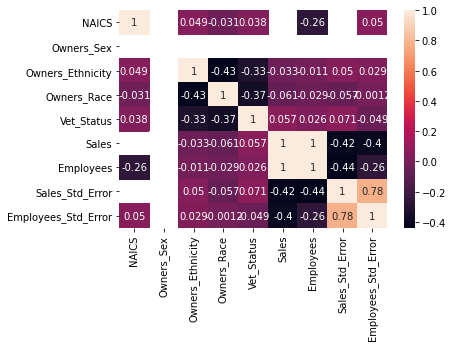

In [63]:
sns.heatmap(WB2019_2.corr(), annot=True)

### For female-owned business, there is a small correlation between sales, ethnicity, and vet status.


# Determine Dependent t-Test

In [65]:
from scipy import stats

## Test assumptions:

<AxesSubplot:>

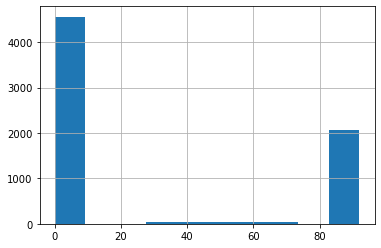

In [66]:
WB2019_2['Owners_Race'].hist()

<AxesSubplot:>

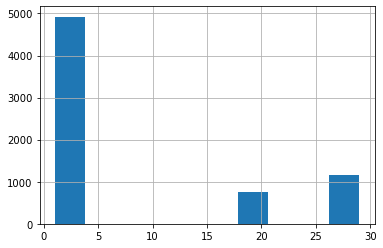

In [67]:
WB2019_2['Owners_Ethnicity'].hist()

<AxesSubplot:>

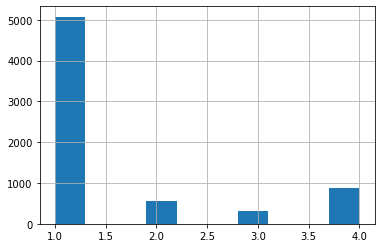

In [68]:
WB2019_2['Vet_Status'].hist()

<AxesSubplot:>

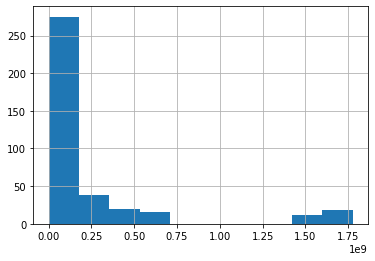

In [69]:
WB2019_2['Sales'].hist()

<AxesSubplot:>

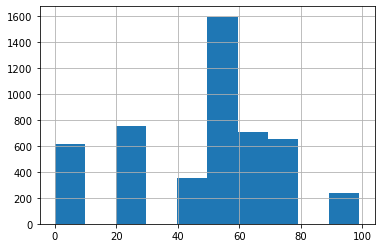

In [70]:
WB2019_2['NAICS'].hist()

### Data is not normally distributed and therefore violates assumptions.

# Determine MANOVA on R.